<a href="https://colab.research.google.com/github/mc7836/Python_Projects/blob/main/AustinOption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group 9 Final Project - Where Should I Open My Restaurant?**

##### Amy Park, Cesar Espinoza, Danny Gallegos, and Margarita Coronel

### **Background**
### In real estate, the three things that matter the most are location, location, and location. So in a bustling city like Austin, TX, how would a new restaurant choose its location? We have several business criteria a location should meet - saturation of the cuisine in a neighborhood among others - and offer a perspective on the competitive landscape for a new restaurant. For our use case, we will be opening a pizzeria in Austin, TX. 
#### Note:
*   This analysis focuses on the competitive landscape only.  Factors such as real estate prices of locations or demographic data are not in scope

### **Executive Summary**
### This analysis was conducted using Yelp Academic Data in five steps (import data, clean data, explore data, measure competitive landscape of a given area, and result/conclusion). 
### We import and clean the data to focus on restaurants in  Austin, Texas, then present our initial findings of the data in various visualizations such as histograms and geographical maps. We then focus on three sample areas to analyze the competitive landscape in theses areas, and based on our business critieria for measuring competitiveness offer our perspective on which is the most optimal of the sample group. In closing, we address further steps that will help make this analysis more robust. 

### **1. Importing the Data**


#### **1.1 Import Data** - we used the publicly available Yelp academic data to import data via Google Drive, clean the dataset, and conduct this analysis

In [ ]:
import pandas as pd
import io

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Since the date is in json format we import the json library
import json
!
f = open('/content/drive/MyDrive/data/yelp_academic_dataset_business.json',)
f

<_io.TextIOWrapper name='/content/drive/MyDrive/data/yelp_academic_dataset_business.json' mode='r' encoding='UTF-8'>

In [ ]:
# Uploading JSON data into data list
data1 = []
for line in open('/content/drive/MyDrive/data/yelp_academic_dataset_business.json', 'r'):
    data1.append(json.loads(line))
data1[0]

{'address': '921 Pearl St',
 'attributes': {'Alcohol': "'beer_and_wine'",
  'Ambience': "{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': True}",
  'BikeParking': 'True',
  'BusinessAcceptsBitcoin': 'False',
  'BusinessAcceptsCreditCards': 'True',
  'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",
  'Caters': 'True',
  'DogsAllowed': 'False',
  'GoodForMeal': "{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': False, 'breakfast': False}",
  'HappyHour': 'True',
  'HasTV': 'True',
  'NoiseLevel': "u'average'",
  'OutdoorSeating': 'True',
  'RestaurantsAttire': "'casual'",
  'RestaurantsDelivery': 'None',
  'RestaurantsGoodForGroups': 'True',
  'RestaurantsPriceRange2': '2',
  'RestaurantsReservations': 'False',
  'RestaurantsTableService': 'True',
  'RestaurantsTakeOut': 'True',
  'WheelchairAcces

#### **1.2 Exploring the Data and Creating a Dataframe**
#### We then explore the data to see what kind of attributes the dataset has and the format of the data. We then proceed to create a dataframe to store the data.


In [ ]:
# Exploring the data set's main keys
dict1 = data1[1]
dict1.keys()

dict_keys(['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours'])

In [ ]:
# Now that we know the dictionary keys we proceed to create a data frame with Pandas
df = pd.DataFrame(data1, columns=['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours'])
df.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."


In [ ]:
df.attributes[0]

{'Alcohol': "'beer_and_wine'",
 'Ambience': "{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': True}",
 'BikeParking': 'True',
 'BusinessAcceptsBitcoin': 'False',
 'BusinessAcceptsCreditCards': 'True',
 'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",
 'Caters': 'True',
 'DogsAllowed': 'False',
 'GoodForMeal': "{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': False, 'breakfast': False}",
 'HappyHour': 'True',
 'HasTV': 'True',
 'NoiseLevel': "u'average'",
 'OutdoorSeating': 'True',
 'RestaurantsAttire': "'casual'",
 'RestaurantsDelivery': 'None',
 'RestaurantsGoodForGroups': 'True',
 'RestaurantsPriceRange2': '2',
 'RestaurantsReservations': 'False',
 'RestaurantsTableService': 'True',
 'RestaurantsTakeOut': 'True',
 'WheelchairAccessible': 'True',
 'WiFi': "u'free'"}

In [ ]:
cat2 = df.categories[0]
cat2

'Gastropubs, Food, Beer Gardens, Restaurants, Bars, American (Traditional), Beer Bar, Nightlife, Breweries'

### **2. Cleaning the Data**


#### **2.1 Filtering only for Austin, TX restaurants**

In [ ]:
#Filtering to open TX businesses and Austin within 
tx_business =  df[df['state']=='TX']
tx_business_open = tx_business[tx_business['is_open']==1]
austin_business = tx_business_open[tx_business_open['city']=='Austin']
austin_business.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
8,N3_Gs3DnX4k9SgpwJxdEfw,Lane Wells Jewelry Repair,"7801 N Lamar Blvd, Ste A140",Austin,TX,78752,30.346169,-97.711458,5.0,30,1,"{'RestaurantsPriceRange2': '1', 'ByAppointment...","Shopping, Jewelry Repair, Appraisal Services, ...","{'Monday': '12:15-17:0', 'Tuesday': '12:15-17:..."
24,nTIhpR7MhsALPwg_Hh14EA,DoubleTree by Hilton Hotel Austin,6505 N Interstate 35,Austin,TX,78752,30.326377,-97.704543,3.0,139,1,"{'WiFi': 'u'free'', 'RestaurantsPriceRange2': ...","Hotels, Hotels & Travel, Event Planning & Serv...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
27,8XyEpVdAO0o6iVkVxkWosQ,PS Property Management Company,"2506 S Lamar Blvd, Ste 2",Austin,TX,78704,30.246465,-97.778738,4.5,9,1,{'BusinessAcceptsCreditCards': 'True'},"Home Services, Real Estate, Property Management","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
37,NVfOn7TdnHbaGH97CVB_Qg,McKinley Chiropractic,"5625 Eiger Rd, Ste 160",Austin,TX,78735,30.244902,-97.857409,5.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Accept...","Chiropractors, Health & Medical","{'Monday': '9:0-17:45', 'Tuesday': '12:0-17:45..."
39,s8eTWEtW5WcnL2kUxrOVmw,Austin Regional Clinic: ARC Quarry Lake,"4515 Seton Center Pkwy, Ste 220",Austin,TX,78759,30.401657,-97.742943,3.5,48,1,"{'ByAppointmentOnly': 'True', 'AcceptsInsuranc...","Diagnostic Services, Doctors, Internal Medicin...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."


In [ ]:
# Filtering to Austin-only Restaurants
austin_restaurants = austin_business[austin_business['categories'].str.contains("Restaurants", na=False)]
austin_restaurants.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
41,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",Austin,TX,78735,30.234533,-97.877262,4.5,395,1,"{'Ambience': '{'touristy': False, 'hipster': F...","Bars, Nightlife, Cocktail Bars, Seafood, Resta...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
61,bRsDZ44CD3uhGnRY3NeQhQ,Wendy's,6247 Mcneil Drive,Austin,TX,78729,30.441875,-97.746581,2.0,46,1,"{'RestaurantsPriceRange2': '1', 'OutdoorSeatin...","Fast Food, Restaurants, Burgers","{'Monday': '6:30-1:0', 'Tuesday': '6:30-1:0', ..."
199,Pk4ZwXwUU50BDn5gqw_rKg,Johnny Carino's,9500 S IH-35 Service Rd,Austin,TX,78748,30.162081,-97.789132,3.0,136,1,"{'RestaurantsGoodForGroups': 'True', 'Business...","Italian, Salad, Pizza, Nightlife, Restaurants,...","{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3..."
253,Ieelu69Y23nbjKG3OGfwnw,McDonald's,5017 Hwy 290 W,Austin,TX,78735,30.232133,-97.823183,1.5,9,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsRes...","Restaurants, Coffee & Tea, Food, Burgers, Fast...","{'Monday': '7:0-22:30', 'Tuesday': '7:0-22:30'..."
258,IFB2K3BEZ2L_Mv5AbUD26Q,Chispas,214 W 4th St,Austin,TX,78701,30.266996,-97.745362,3.5,119,1,"{'RestaurantsTakeOut': 'True', 'OutdoorSeating...","Tex-Mex, Mexican, Tacos, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


In [ ]:
# Restricting data to Pizza joints
pizza_joint = austin_restaurants[austin_restaurants['categories'].str.contains("Pizza|Pizzeria|pizza|pizzeria", na=False)]
pizza_joint.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
199,Pk4ZwXwUU50BDn5gqw_rKg,Johnny Carino's,9500 S IH-35 Service Rd,Austin,TX,78748,30.162081,-97.789132,3.0,136,1,"{'RestaurantsGoodForGroups': 'True', 'Business...","Italian, Salad, Pizza, Nightlife, Restaurants,...","{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3..."
267,fBvQQUk1-V9IUA8PbuYFWg,Newk's Eatery,408 Congress Ave,Austin,TX,78701,30.266639,-97.743659,3.5,43,1,"{'HasTV': 'True', 'BusinessParking': '{'garage...","Pizza, Restaurants, American (Traditional), Am...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-18:0',..."
1354,DSEsFWzM3UCq54E2X0P9Zg,Mangieri's Pizza Cafe,5900 W Slaughter Ln,Austin,TX,78749,30.201336,-97.878995,4.0,237,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': 'u'f...","Restaurants, Pizza, Italian","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
1857,p99DZXmdF7smudK9FnlC9A,Spartan Pizza,1007 E 6th St,Austin,TX,78702,30.264940,-97.732093,4.0,264,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Food Trucks, Pizza, Salad, Sandwiches, Food, E...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
2886,zIrE7JvF0xVprDjbnL4PDQ,J Clips,900 E Braker Ln,Austin,TX,78753,30.376738,-97.673122,3.0,15,1,"{'BusinessAcceptsCreditCards': 'False', 'ByApp...","Beauty & Spas, Barbers, Pizza, Restaurants","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


#### **2.2 Visualizing all of the pizza joints in the data source**

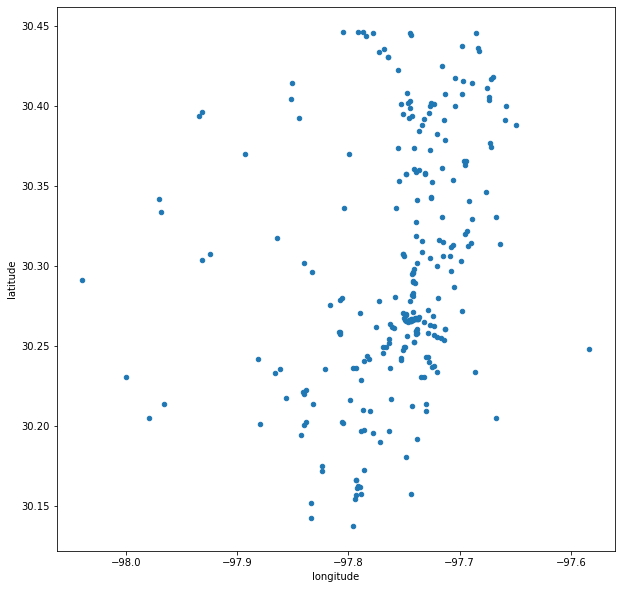

In [ ]:
# Getting a scatter plot of the pizza joints in all of Austin
pizza_joint.plot(
    kind='scatter', 
    x='longitude', 
    y='latitude',
    figsize = (10,10)
)

### **3. First Look at Clean Data - Analysis**
### We analyze the clean data by visualizing the Austin, TX restaurant data

#### **3.1 Where are the pizzerias in Austin?**

In [ ]:
! pip3 install -U geopandas fiona shapely pyproj geopy pysal descartes

     |████████████████████████████████| 1.0 MB 12.8 MB/s 
     |████████████████████████████████| 16.7 MB 41.8 MB/s 
     |████████████████████████████████| 6.3 MB 77.9 MB/s 
     |████████████████████████████████| 118 kB 71.6 MB/s 
     |████████████████████████████████| 147 kB 70.9 MB/s 
     |████████████████████████████████| 41 kB 529 kB/s 
     |████████████████████████████████| 83 kB 2.1 MB/s 
     |████████████████████████████████| 243 kB 76.0 MB/s 
     |████████████████████████████████| 5.7 MB 40.7 MB/s 
     |████████████████████████████████| 60 kB 7.8 MB/s 
     |████████████████████████████████| 95 kB 4.4 MB/s 
     |████████████████████████████████| 46 kB 3.7 MB/s 
     |████████████████████████████████| 209 kB 73.1 MB/s 
     |████████████████████████████████| 2.4 MB 62.2 MB/s 
     |████████████████████████████████| 55 kB 4.0 MB/s 
     |████████████████████████████████| 179 kB 63.6 MB/s 
     |████████████████████████████████| 2.1 MB 60.2 MB/s 
     |███████████████████

In [ ]:
!sudo apt-get install -y libgeos-dev python3-rtree
import geopandas as gpd

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 40 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pkg-resources all 39.0.1-2 [98.8 kB]
Get

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


##### Map data source:
[DATA](https://data.austintexas.gov/browse?q=BOUNDARIES_jurisdictions&sortBy=relevance)

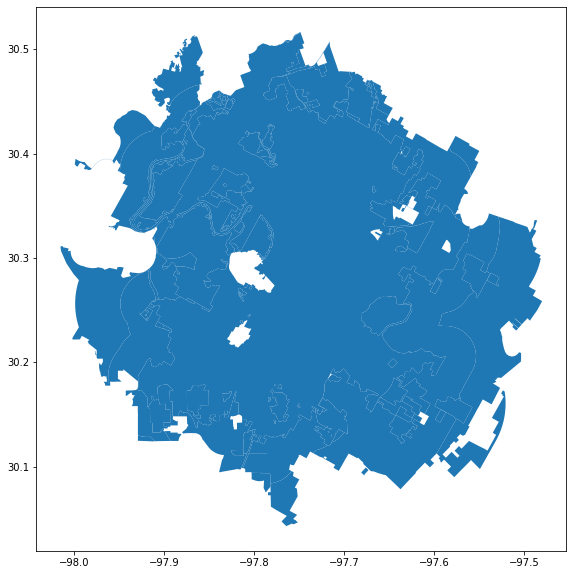

In [ ]:
# Creating jurisdictions map of Austin
df_austin = gpd.GeoDataFrame.from_file('/content/drive/MyDrive/data/BOUNDARIES_jurisdictions.geojson')
df_austin.plot(figsize=(10,10))

In [ ]:
# creating a geometry point with GeoPandas to use it later to create a boundary
gdf = gpd.GeoDataFrame(
    austin_restaurants, geometry=gpd.points_from_xy(austin_restaurants.longitude, austin_restaurants.latitude))
gdf.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,geometry
41,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",Austin,TX,78735,30.234533,-97.877262,4.5,395,1,"{'Ambience': '{'touristy': False, 'hipster': F...","Bars, Nightlife, Cocktail Bars, Seafood, Resta...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",POINT (-97.87726 30.23453)
61,bRsDZ44CD3uhGnRY3NeQhQ,Wendy's,6247 Mcneil Drive,Austin,TX,78729,30.441875,-97.746581,2.0,46,1,"{'RestaurantsPriceRange2': '1', 'OutdoorSeatin...","Fast Food, Restaurants, Burgers","{'Monday': '6:30-1:0', 'Tuesday': '6:30-1:0', ...",POINT (-97.74658 30.44188)
199,Pk4ZwXwUU50BDn5gqw_rKg,Johnny Carino's,9500 S IH-35 Service Rd,Austin,TX,78748,30.162081,-97.789132,3.0,136,1,"{'RestaurantsGoodForGroups': 'True', 'Business...","Italian, Salad, Pizza, Nightlife, Restaurants,...","{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3...",POINT (-97.78913 30.16208)
253,Ieelu69Y23nbjKG3OGfwnw,McDonald's,5017 Hwy 290 W,Austin,TX,78735,30.232133,-97.823183,1.5,9,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsRes...","Restaurants, Coffee & Tea, Food, Burgers, Fast...","{'Monday': '7:0-22:30', 'Tuesday': '7:0-22:30'...",POINT (-97.82318 30.23213)
258,IFB2K3BEZ2L_Mv5AbUD26Q,Chispas,214 W 4th St,Austin,TX,78701,30.266996,-97.745362,3.5,119,1,"{'RestaurantsTakeOut': 'True', 'OutdoorSeating...","Tex-Mex, Mexican, Tacos, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",POINT (-97.74536 30.26700)


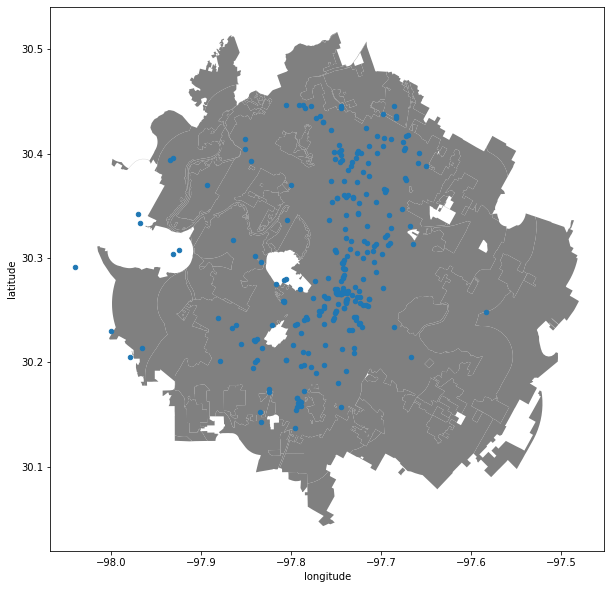

In [ ]:
base = df_austin.plot(linewidth=0.3, color='grey', figsize = (20,20))

pizza_joint.plot(
    kind='scatter', 
    x='longitude', 
    y='latitude',
    figsize = (10,10),
    ax = base
)

##### Pizzerias are concentrated in the middle of the city. The right side of the city has many industrial areas explaining the lack of pizzerias

#### **3.2 How many pizzerias are there per zipcode?**

In [ ]:
pizza_per_zip = pizza_joint.groupby('postal_code').name.count()
pizza_per_zip_sorted = pizza_per_zip.sort_values(ascending=False)
pizza_per_zip_sorted

postal_code
78701    29
78704    23
78759    16
78753    15
78702    14
78745    14
78758    12
78748    12
78746    11
78741    10
78757    10
78723    10
78705    10
78751     7
78744     6
78750     6
78749     6
78731     5
78738     4
78729     4
78735     4
78727     4
78703     4
78734     3
78728     3
78754     2
78752     2
78747     2
78737     2
78756     2
78726     2
78665     1
78736     1
78732     1
78730     1
78724     1
78722     1
78719     1
78798     1
Name: name, dtype: int64

In [ ]:
# total pizzerias in Austin
total_pizza_count = pizza_joint.name.count()
print(total_pizza_count)

262


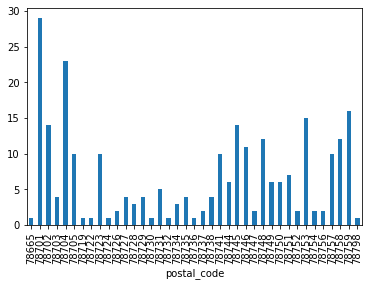

In [ ]:
pizza_per_zip.plot(kind='bar')

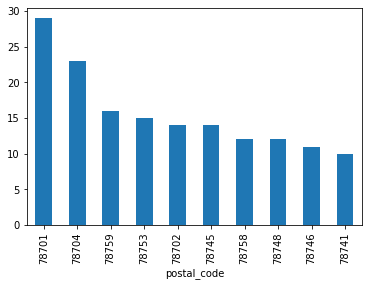

In [ ]:
#Top 10 zip codes
pizza_per_zip_sorted.head(10).plot(kind='bar')


#### **3.3 Concentration of pizzerias among Austin restaurants**

In [ ]:
# Total Restaurants in Austin
total_restaurant_count = austin_restaurants.name.count()
print(total_restaurant_count)

2832


In [ ]:
# % of Pizzerias of Total Restaurants in Austin

pizza_percentage = round((total_pizza_count / total_restaurant_count),2)*100
pizza_percentage

9.0

##### 9% of Austin restaurants are pizzerias

In [ ]:
# 9% is average, but is it telling the full story? We can validate by checking the distribution of concentration by zip code
restaurant_per_zip = austin_restaurants.groupby('postal_code').name.count()

pizza_and_restaurant = pizza_per_zip.to_frame().merge(restaurant_per_zip.to_frame(), left_on='postal_code', right_on='postal_code')
pizza_and_restaurant

concentration_per_zip = (pizza_and_restaurant["name_x"] / pizza_and_restaurant["name_y"]) * 100
pizza_and_restaurant["concentration"] = concentration_per_zip
print(pizza_and_restaurant)

             name_x  name_y  concentration
postal_code                               
78665             1       1     100.000000
78701            29     294       9.863946
78702            14     216       6.481481
78703             4      57       7.017544
78704            23     263       8.745247
78705            10     130       7.692308
78719             1      27       3.703704
78722             1      43       2.325581
78723            10      82      12.195122
78724             1      11       9.090909
78726             2      22       9.090909
78727             4      53       7.547170
78728             3      29      10.344828
78729             4      21      19.047619
78730             1       9      11.111111
78731             5      38      13.157895
78732             1      23       4.347826
78734             3      21      14.285714
78735             4      37      10.810811
78736             1      11       9.090909
78737             2      20      10.000000
78738      

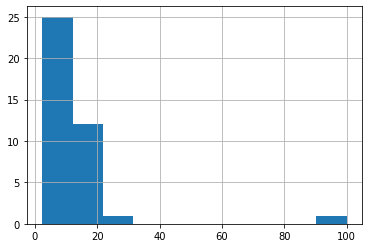

In [ ]:
# Based on the histogram the concentration is clustured in the 0% to 10% band so 9% is a reasonable representative of the city of Austin
pizza_and_restaurant.concentration.hist(bins=10)

##### 9% average concentration tells a reasonable story for the overall Austin as validated by the histogram (most of the concentration in 0-10% range)

#### **3.4 Ratings Distribution and Average of Similar Establishment**

In [ ]:
pizza_per_star = pizza_joint.groupby('stars').name.count()
pizza_per_star.sort_values(ascending=False)


stars
4.0    62
3.5    49
4.5    43
3.0    39
2.0    26
2.5    26
1.5     9
5.0     8
Name: name, dtype: int64

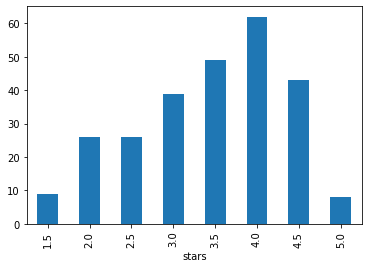

In [ ]:
pizza_per_star.plot(kind='bar')


In [ ]:
total_stars_count = pizza_joint.stars.sum()

average_stars = total_stars_count / total_pizza_count
average_stars

3.437022900763359

##### Distribution of stars among pizzerias is slightly left skewed, with an average of 3.4

#### **3.5 Average Number and Distribution of Reviews per Pizzeria**

In [ ]:
total_review_count = pizza_joint.review_count.sum()

average_review_count = total_review_count / total_pizza_count
average_review_count

189.83969465648855

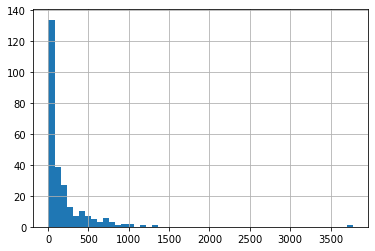

In [ ]:
pizza_joint.review_count.hist(bins=50)

Average review count is 190 but based on the histogram of review counts, 0-50 reviews seem to be the most common amount

#### **3.6 Correlation with Bars**
As an aside, we were curious to see if there is a correlation between location of bars/pubs and pizzerias and to potential identify a location where this synergy is lacking i.e. there are bars, but no pizzeria.  


In [ ]:
# creating a variable for all austin restaurants containing "Bar" in categories
bars_joint = austin_restaurants[austin_restaurants['categories'].str.contains("Bars", na=False)]
bars_joint.head(5)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,geometry
41,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",Austin,TX,78735,30.234533,-97.877262,4.5,395,1,"{'Ambience': '{'touristy': False, 'hipster': F...","Bars, Nightlife, Cocktail Bars, Seafood, Resta...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",POINT (-97.87726 30.23453)
199,Pk4ZwXwUU50BDn5gqw_rKg,Johnny Carino's,9500 S IH-35 Service Rd,Austin,TX,78748,30.162081,-97.789132,3.0,136,1,"{'RestaurantsGoodForGroups': 'True', 'Business...","Italian, Salad, Pizza, Nightlife, Restaurants,...","{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3...",POINT (-97.78913 30.16208)
669,_rt-Z934kfFzgG19nTrIcQ,Pelons Tex-Mex,802 Red River St,Austin,TX,78701,30.268838,-97.736549,3.5,438,1,"{'HasTV': 'True', 'BusinessParking': '{'garage...","Tex-Mex, Restaurants, Tacos, Nightlife, Bars, ...","{'Tuesday': '16:0-22:0', 'Wednesday': '16:0-22...",POINT (-97.73655 30.26884)
778,J8Ha6yIvGoU-E31jnCq7Ew,Barley Swine,"6555 Burnet Rd, Ste 400",Austin,TX,78757,30.341274,-97.738389,4.5,1086,1,"{'RestaurantsAttire': 'u'casual'', 'GoodForKid...","Restaurants, Nightlife, American (New), Bars, ...","{'Monday': '0:0-0:0', 'Tuesday': '17:0-22:0', ...",POINT (-97.73839 30.34127)
861,pCg4oRweZQnoXo2j7_-BqQ,Hote1e1even,1123 East 11th St,Austin,TX,78702,30.268729,-97.728389,4.5,13,1,"{'WiFi': ''free'', 'RestaurantsPriceRange2': '...","Hotels, Event Planning & Services, Restaurants...",None,POINT (-97.72839 30.26873)


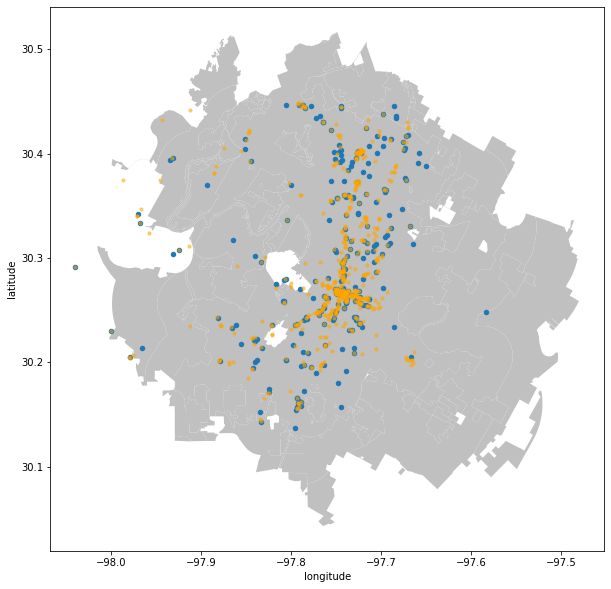

In [ ]:
# Combining Pizza places and Bars into one scatter plot
base1 = df_austin.plot(linewidth=0.3, color='silver', figsize = (20,20))
pizza_joint.plot(
    kind='scatter', 
    x='longitude', 
    y='latitude',
    figsize = (10,10),
    ax = base1
)
bars_joint.plot(
    
    c = "orange",            
    s = 10, 
    alpha = .50,           
    kind='scatter', 
    x='longitude', 
    y='latitude',
    figsize = (10,10),
    ax = base1
)

##### Pizzerias are very much in line with location of bars

### **4. Competitive Landscape for a Given Location**
#### Here we take a look at the competitive landscape for a given location by defining radius for search and creating a scoring system based on our analysis in section 3 above


#### **4.1 Defining Radius for Search**

In [ ]:
#creating data frame for 3 sample locations

#Reference point #1
reference_point1 = pd.DataFrame(
    {'location': ['target_point'],
     'Latitude': [30.267255],
     'Longitude': [-97.743626]})

gdf_ref1 = gpd.GeoDataFrame(
    reference_point1, geometry=gpd.points_from_xy(reference_point1.Longitude, reference_point1.Latitude))

#Reference point #2 (commercial area in the NE)
reference_point2 = pd.DataFrame(
    {'location': ['target_point'],
     'Latitude': [30.327068],
     'Longitude': [-97.707002]})

gdf_ref2 = gpd.GeoDataFrame(
    reference_point2, geometry=gpd.points_from_xy(reference_point2.Longitude, reference_point2.Latitude))

#Reference point #3 (South Austin Area)
reference_point3 = pd.DataFrame(
    {'location': ['target_point'],
     'Latitude': [30.202847],
     'Longitude': [-97.806913]})

gdf_ref3 = gpd.GeoDataFrame(
    reference_point3, geometry=gpd.points_from_xy(reference_point3.Longitude, reference_point3.Latitude))

# ref_plot1 = gdf_ref1.plot(linewidth=0.3, color='grey', figsize = (20,20))


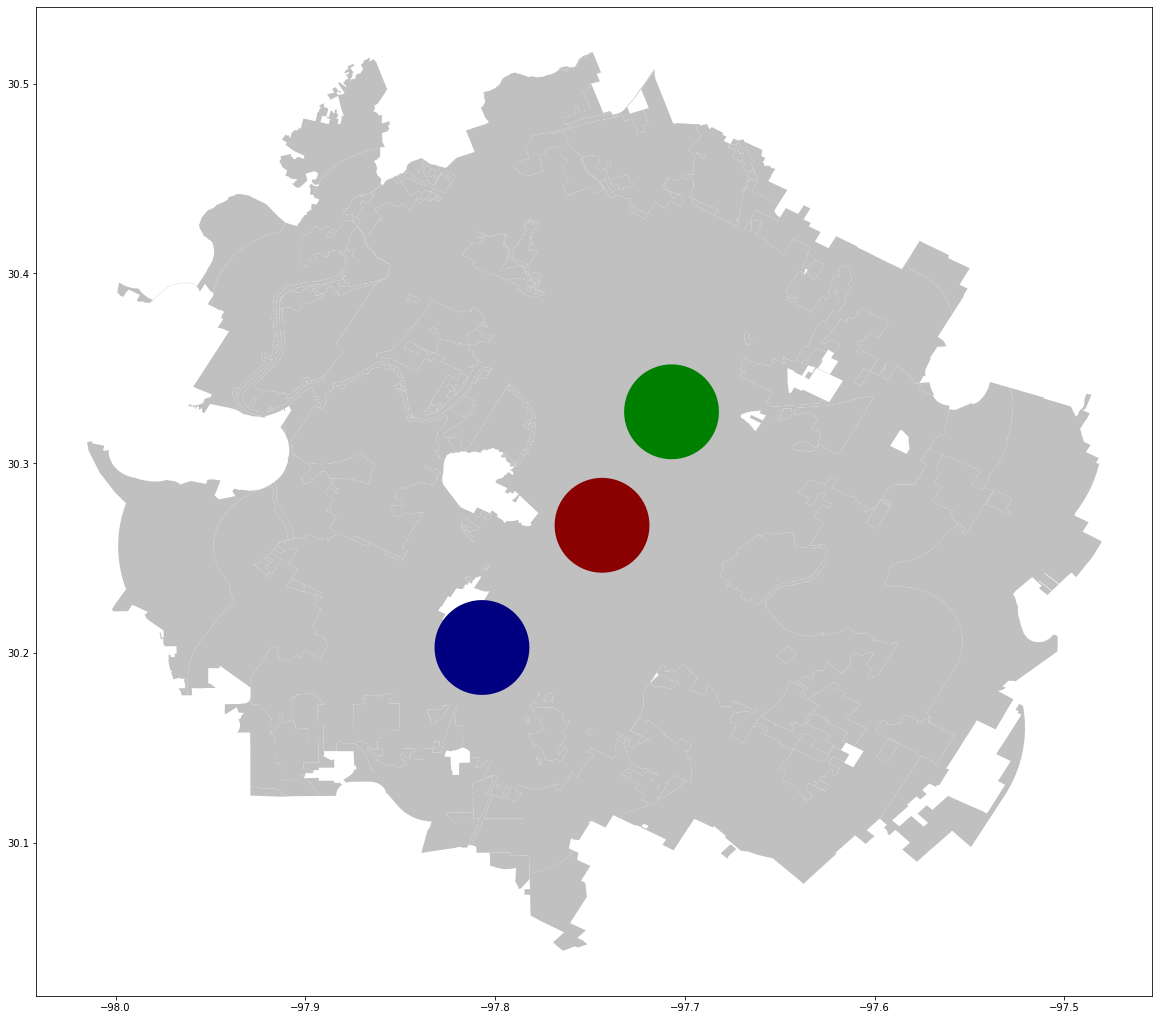

In [ ]:
#Creating dataframe that shows radius from selected point
## i.e. 5*(1/60) is 5 miles radius
ref_radius1 = gdf_ref1.buffer(1.5*(1/60), resolution=16)
ref_radius2 = gdf_ref2.buffer(1.5*(1/60), resolution=16) 
ref_radius3 = gdf_ref3.buffer(1.5*(1/60), resolution=16)

# ref_base = ref_radius1.plot(linewidth=0.3, color='grey', figsize = (20,20))
base1 = df_austin.plot(linewidth=0.3, color='silver', figsize = (20,20))
ref_radius1.plot(linewidth=0.3, color='darkred', figsize = (20,20), ax = base1)
ref_radius2.plot(linewidth=0.3, color='green', figsize = (20,20), ax = base1)
ref_radius3.plot(linewidth=0.3, color='navy', figsize = (20,20), ax = base1)

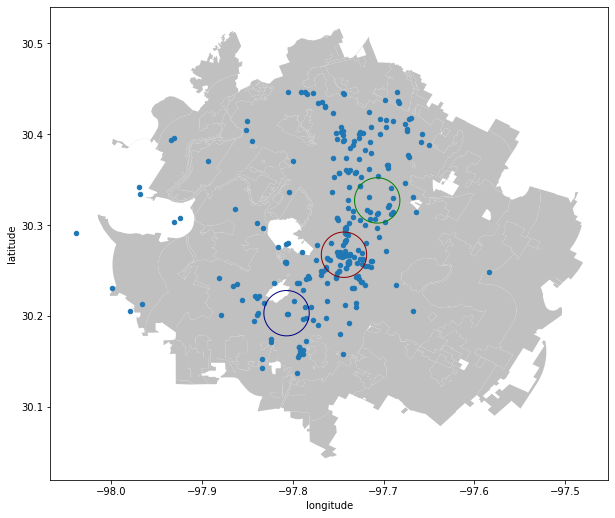

In [ ]:
base = df_austin.plot(linewidth=0.3, color='silver', figsize = (20,20))
pizza_joint.plot(
    kind='scatter', 
    x='longitude', 
    y='latitude',
    figsize = (10,10),
    ax = base
)

ref_radius1.plot(
    linewidth=1, 
    color='none',
    edgecolor='darkred',
    figsize = (20,20),
    ax = base
)
ref_radius2.plot(
    linewidth=1, 
    color='none', 
    edgecolor='green',
    figsize = (20,20),
    ax = base
)
ref_radius3.plot(
    linewidth=1, 
    color='none', 
    edgecolor='navy',
    figsize = (20,20),
    ax = base
)

In [ ]:
from shapely.geometry import Point, Polygon, LineString
from shapely import geometry


In [ ]:
# Creating a polygon for from the defined boundary
polys1 = gpd.GeoSeries(ref_radius1)
polys2 = gpd.GeoSeries(ref_radius2)
polys3 = gpd.GeoSeries(ref_radius3)


In [ ]:
# Creating points from results (all data)
points = austin_restaurants["geometry"]
points

41        POINT (-97.87726 30.23453)
61        POINT (-97.74658 30.44188)
199       POINT (-97.78913 30.16208)
253       POINT (-97.82318 30.23213)
258       POINT (-97.74536 30.26700)
                     ...            
160413    POINT (-97.89304 30.37022)
160465    POINT (-97.76447 30.27416)
160480    POINT (-97.79541 30.21882)
160517    POINT (-97.78845 30.19675)
160525    POINT (-97.80443 30.44754)
Name: geometry, Length: 2832, dtype: geometry

In [ ]:
!pip install rtree

In [ ]:
#checking df types
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [ ]:
#checking df types
type(ref_radius1)

geopandas.geoseries.GeoSeries

In [ ]:
# creating an envelope so we can work a join with the gp dataframe
envgdf1 = gpd.GeoDataFrame(geometry=gpd.GeoSeries(ref_radius1))
envgdf2 = gpd.GeoDataFrame(geometry=gpd.GeoSeries(ref_radius2))
envgdf3 = gpd.GeoDataFrame(geometry=gpd.GeoSeries(ref_radius3))
print(envgdf1, envgdf2, envgdf3)

                                            geometry
0  POLYGON ((-97.71863 30.26725, -97.71875 30.264...                                             geometry
0  POLYGON ((-97.68200 30.32707, -97.68212 30.324...                                             geometry
0  POLYGON ((-97.78191 30.20285, -97.78203 30.200...


In [ ]:
# Creating intersection between gdf data frame and envgdf* dataframe
joined_gdf1 = gpd.sjoin(gdf, envgdf1, op='within')
joined_gdf2 = gpd.sjoin(gdf, envgdf2, op='within')
joined_gdf3 = gpd.sjoin(gdf, envgdf3, op='within')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


#### **4.2 Our Business Criteria for Measuring Competitive Landscape**

1. Number of similar places: -1 for each pizza places as this would mean direct competition
1. Bars: +1 for each bar since bar presence increases the demand for pizza
1. Concentration of pizza places in the radius: if concentration is >10%, then score decreases by 4 since this would mean higher than average concentration of pizzerias in this location (using an even number 10% as a threshold since average concentration was 9%)
1. Quality of competition: if an area is less competitive as measured by the star ratings of restaurants (below 3.5 stars based on our findings in section 3), then increase score by 3

##### *The weights of each criteria were arbitrarily chosen to directionally showcase the favorability of an area; In a given set of few sample locations, the area with the highest score would be the most desirable among the peer set* 

In [ ]:
def score(location):
  '''
  This function takes one positional argument and outputs the score of the location based on our given criteria and information on each criteria
  Arg: location (dataframe)
  '''
  bar = location['categories'].str.contains("Bars", na=False)
  bar_count = bar.count() - bar.value_counts().loc[False]
  pizza = location['categories'].str.contains("Pizza|Pizzeria|pizza|pizzeria", na=False)
  pizza_count = pizza.value_counts().loc[True]
  total_count = location.name.count()
  avg_stars_in_radius = location.stars.mean()

# 1*count of bars + -1*count of pizzerias
  base = 1*bar_count + (-1)*pizza_count

# if  (pizzeria count / total business count) >= 0.10 then -4 
  if pizza_count / total_count > 0.10:
    saturation = + -4
  else:
    saturation = 0

# if  average stars < 3.5 then +3 
  if avg_stars_in_radius < 3.50:
    competition_quality = + 3
  else:
    competition_quality = 0


  # return base + saturation + competition_quality
  score_of_location = base + saturation + competition_quality

  print("Score: " + str(score_of_location) + '\n')
  print("Bar count: " + str(bar_count))
  print("Pizza count: " + str(pizza_count))
  print("Total restaurant count: " + str(total_count))
  print("Saturation: " + str(round((pizza_count/total_count),2)*100) + "%")
  print("Competition Level (Avg Star of Area): " + str(round(avg_stars_in_radius,2)))

### **5. Result and Conclusion**
#### We chose 3 sample locations (section 4.1) and measure their competitive landscape using the criteria developed previously (section 4.2) 
#### In closing, we also address various data sets that would enhance this analysis to be more robust

#### **5.1 Result of Three Sample Locations**

In [ ]:
#Sample 1 (Central Austin):
score(joined_gdf1)

Score: 162

Bar count: 216
Pizza count: 54
Total restaurant count: 652
Saturation: 8.0%
Competition Level (Avg Star of Area): 3.93


In [ ]:
#Sample 2 (North Austin):
score(joined_gdf2)

Score: 15

Bar count: 30
Pizza count: 15
Total restaurant count: 194
Saturation: 8.0%
Competition Level (Avg Star of Area): 3.68


In [ ]:
#Sample 3 (South Austin):
score(joined_gdf3)

Score: -2

Bar count: 4
Pizza count: 6
Total restaurant count: 63
Saturation: 10.0%
Competition Level (Avg Star of Area): 3.76


#### **<ins>Result**: Out of the three sample locations, sample 1 (Central Austin) is the most preferred as it has the highest score

#### **5.2 Challenges of this project**
 * Creating the intersection of the selected radius required a number of intermediate steps (creating a geometry from a Geopandas dataset and them creating the intersection itself).
 * Creating the scoring function required full understanding of the data and the various situations when some conditions weren't met.

#### **5.3 In closing, we address various data sets that would enhance this analysis to be more robust**
What kind of information can be layered to take the analysis to the next level?
 * Real estate prices - if a place is good competitively (not too much competition) but too expensive, may be not a feasible option
 * Covid-19 impact on business closures to get a more accurate view of the competitive landscape
 * Demographics to find if demand for your business will be met
 * Pedestrian data to find if a location has good "discoverability" by pedestrians 
 * Parking data to see if those travelling by car will not have an issue accessing the business 
 * Proximity to "hot spots" like universities or office area (in non-pandemic times)
